In [ ]:
# Importing Libraries

In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [ ]:
# Reading the data

In [7]:
client_data = pd.read_csv("./datasets/client_data.csv")
deposit_data = pd.read_csv("./datasets/deposit_data.csv")
calendar_data = pd.read_csv("./datasets/calendar_data.csv")

In [ ]:
# Checking data frame

In [8]:
client_data.head()

,client_id,client_geographical_region,client_residence_status,client_age
0,538839486596724,Northeast,Rent,91
1,321708286091707,West,Own,83
2,848531901757235,Midwest,Own,84
3,854405182328779,Northeast,Own,83
4,769102176031316,West,Own,85


In [9]:
deposit_data.head()

,client_id,deposit_type,deposit_amount,deposit_cadence,deposit_date
0,446495122764671,Actual Deposit,303.0,Monthly,2019-10-23
1,446495122764671,Actual Deposit,303.0,Monthly,2019-09-23
2,446495122764671,Scheduled Deposit,303.0,Monthly,2019-09-23
3,446495122764671,Scheduled Deposit,303.0,Monthly,2019-10-23
4,446495122764671,Scheduled Deposit,303.0,Monthly,2019-06-23


In [14]:
deposit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480394 entries, 0 to 480393
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   client_id        480394 non-null  int64  
 1   deposit_type     480394 non-null  object 
 2   deposit_amount   480394 non-null  float64
 3   deposit_cadence  480394 non-null  object 
 4   deposit_date     480394 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 18.3+ MB


In [49]:
deposit_data['deposit_cadence'].value_counts()

deposit_cadence
Monthly     262858
Biweekly    209189
Extra         8347
Name: count, dtype: int64

In [15]:
deposit_data['deposit_date'] = pd.to_datetime(deposit_data['deposit_date'])

In [25]:
len(deposit_data)

480394

In [10]:
calendar_data.head()

,gregorian_date,month_name
0,2019-06-01,Month 1
1,2019-06-02,Month 1
2,2019-06-03,Month 1
3,2019-06-04,Month 1
4,2019-06-05,Month 1


In [23]:
calendar_data['gregorian_date'] = pd.to_datetime(calendar_data['gregorian_date'])
calendar_data.head()

,gregorian_date,month_name
0,2019-06-01,Month 1
1,2019-06-02,Month 1
2,2019-06-03,Month 1
3,2019-06-04,Month 1
4,2019-06-05,Month 1


In [ ]:
# Combining deposit data and calendar data for further analysis

In [40]:
df1 = pd.merge(left=deposit_data, right=calendar_data, how='left', left_on='deposit_date',right_on='gregorian_date')

In [41]:
df1.head()

,client_id,deposit_type,deposit_amount,deposit_cadence,deposit_date,gregorian_date,month_name
0,446495122764671,Actual Deposit,303.0,Monthly,2019-10-23,2019-10-23,Month 5
1,446495122764671,Actual Deposit,303.0,Monthly,2019-09-23,2019-09-23,Month 4
2,446495122764671,Scheduled Deposit,303.0,Monthly,2019-09-23,2019-09-23,Month 4
3,446495122764671,Scheduled Deposit,303.0,Monthly,2019-10-23,2019-10-23,Month 5
4,446495122764671,Scheduled Deposit,303.0,Monthly,2019-06-23,2019-06-23,Month 1


In [42]:
df = pd.merge(left=df1, right=client_data, how='left', left_on='client_id',right_on='client_id')

In [44]:
len(df)

480394

In [75]:
summary = df.groupby(['month_name','deposit_type'])['deposit_amount'].agg(func=['mean','count','sum'])

In [76]:
summary

mean  count          sum
month_name deposit_type                                     
Month 1    Actual Deposit     381.519229  37456  14290184.25
           Scheduled Deposit  371.421233  40371  14994646.61
Month 2    Actual Deposit     377.894721  38777  14653623.58
           Scheduled Deposit  367.693533  41428  15232807.69
Month 3    Actual Deposit     373.865788  52223  19524393.05
           Scheduled Deposit  358.030348  56282  20150664.05
Month 4    Actual Deposit     362.549867  52273  18951569.18
           Scheduled Deposit  354.290045  55221  19564250.55
Month 5    Actual Deposit     361.030182  51679  18657678.80
           Scheduled Deposit  355.195239  54684  19423496.43

1. EDA

In [ ]:
# Let us see the impact on mean deposit amount

<Axes: xlabel='month_name', ylabel='deposit_amount'>

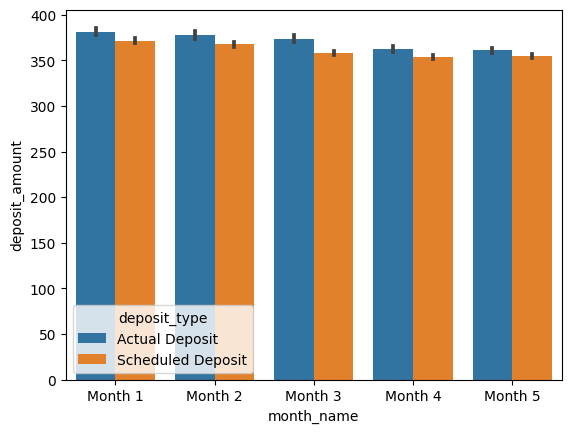

In [38]:
month =[f'Month {i}' for i in range(1,6)]

sns.barplot(data= df, x='month_name', y = 'deposit_amount', estimator='mean',hue='deposit_type', order= month)

In [ ]:
# Let us see the impact on total deposit amount

<Axes: xlabel='month_name', ylabel='sum'>

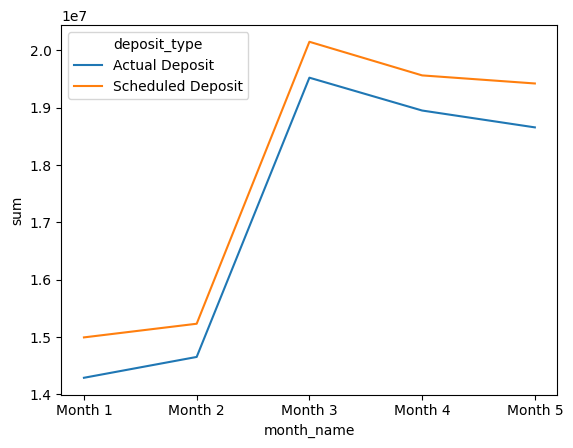

In [73]:
sns.lineplot(data= summary, x='month_name', y = 'sum',hue='deposit_type')

<Axes: xlabel='month_name', ylabel='deposit_amount'>

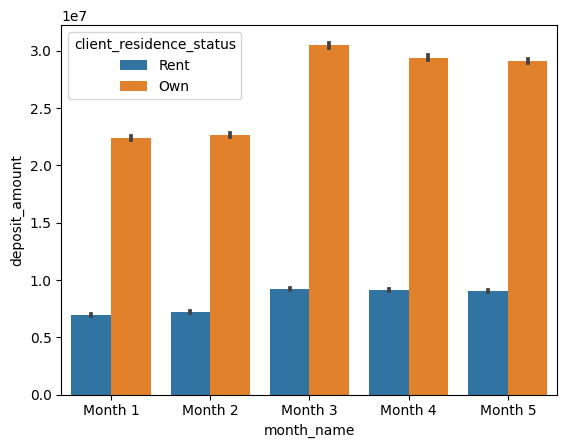

In [47]:
sns.barplot(data= df, x='month_name', y = 'deposit_amount', estimator='sum',hue='client_residence_status', order=month)

<Axes: xlabel='month_name', ylabel='deposit_amount'>

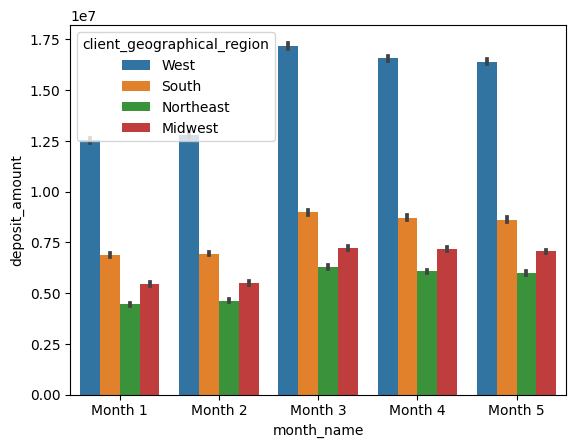

In [45]:
sns.barplot(data= df, x='month_name', y = 'deposit_amount', estimator='sum',hue='client_geographical_region', order=month)

In [ ]:
# Let us see the impact on total number of deposits 

<Axes: xlabel='month_name', ylabel='count'>

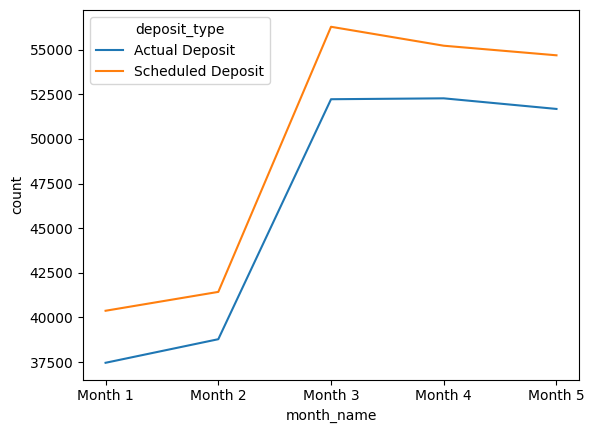

In [77]:
sns.lineplot(data= summary, x='month_name',y='count' ,hue='deposit_type')

In [100]:
client_pre = set(df[(df['month_name'] == "Month 1") |(df['month_name'] == "Month 2") ]['client_id'].unique())
client_on = set(df[df['month_name'] == "Month 3"]['client_id'].unique())
client_post = set(df[(df['month_name'] == "Month 4") |(df['month_name'] == "Month 5") ]['client_id'].unique())

In [101]:
#client acquired during campaign
len(client_on - client_pre )

11544

In [102]:
# Client acquired after campaign
len(client_post - (client_on | client_pre ) )

752

In [ ]:
#Question 1
#Provide a quantitative assessment of whether the marketing campaign was successful. How and why did you choose your specific success metric(s)?



In [ ]:
"""
We know that the ad campaign was running during the 3rd month of our data set. A huge spike can be noticed in the line plot titled "Deposit amount per month" in the month of 3, i.e., while the campaign was running. Since then, the deposit amount has been slowly decreasing but has remained at very higher levels than before the campaign.

During the third month of the dataset, an advertising campaign was implemented, resulting in a significant spike in deposit amounts for Freedom Debt Relief. This spike amounted to almost $10 million more than previous months. Subsequently, in the months following the campaign, although there was a gradual decline in deposit amounts, they remained substantially higher than before the campaign, with $8.5 million in the immediate month after and $8 million in the last month of data.

The cost of the campaign was $5 million, and the incurred deposit amount increased by a total of $26.5 million. A quick Google search for "freedom debt relief pricing" reveals an 18-25% fee incurred by the company for its services. 
Assuming the lowest, 18% fee for all clients, we observe an increase in profits to $4.77 million (26.5M * 18%). While this looks like a loss of $230K for the campaign, it is important to note that the trend shows this would have been much higher without the campaign, and it is very unlikely that the minimum fee is applied to all clients, so this number should be treated as the most pessimistic estimate.


"""

In [ ]:
# Question 2
# Based on the provided data, how would you recommend campaign strategy be adjusted in the future to improve performance?

In [ ]:
"""
We find that the campaign has been most effective in North area. Region like south, northeast and midwest needs to be targeted more

Campaign has been effective in increaasing the customer who owned the house but the ones who are on rented. We can modify campaign comunication for this audience as well




"""

In [ ]:
#Question 3
#How do you think campaign performance would have changed if we did not run the campaign in Month 3, but instead postponed it until month 6? Provide an incremental number versus your result in Question #1.

In [ ]:
"""
One way we can simulate the postponement of the campaign is to "postpone" the deposits coming from new clients who were acquired during the third month. We (strongly) assume that the clients who made their first deposit in the third month in the data set are acquired due to the campaign; this is not necessarily correct, but for the sake of the exercise we can treat it as if it were.

Technically speaking, this means we should take the following steps.

Identify which clients made their first deposit in the third month, i.e., were acquired because of the campaign. (we have already done that in previous sections)
Postpone their deposits until after the fifth month, i.e., add exactly three months to the date of their deposit.
Re-run the same analyses from Question 1 and make summarise the difference in the results.
"""

In [103]:
df_copy = df.copy(deep=True)

In [104]:
new_clients = set(client_on).difference(set(client_pre))

In [105]:
import datetime

def simulate_campaign_postponement(row):
    if row.client_id in new_clients:
        row.deposit_date = pd.to_datetime(row.deposit_date) + datetime.timedelta(days=90)
        if row.month_name == "Month 3":
            row.month_name = "Month 6"
        elif row.month_name == "Month 4":
            row.month_name = "Month 7"
        elif row.month_name == "Month 5":
            row.month_name = "Month 8"
    else:
        row.deposit_date = pd.to_datetime(row.deposit_date)
    return row

df_copy = df_copy.apply(func=simulate_campaign_postponement, axis=1)

In [106]:
avg_monthly_deposit = (df_copy.groupby(by=df_copy["month_name"])["deposit_amount"].sum()).mean()

month_name
Month 1    2.928483e+07
Month 2    2.988643e+07
Month 3    3.000242e+07
Month 4    2.730677e+07
Month 5    2.813815e+07
Month 6    3.160305e+07
Month 7    3.313946e+07
Month 8    3.187344e+07
Name: deposit_amount, dtype: float64


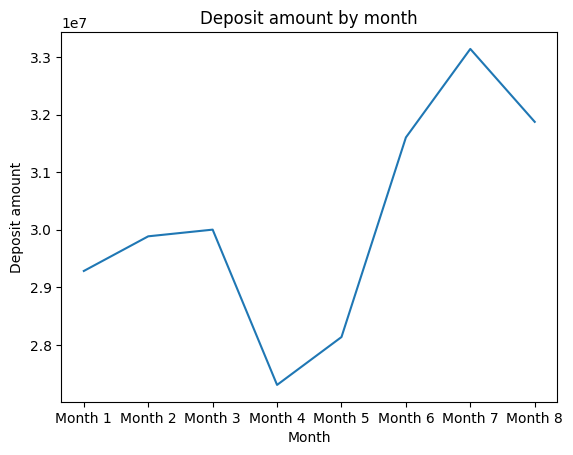

In [107]:
deposit_amount_by_month = df_copy.groupby(by=df_copy["month_name"])["deposit_amount"].sum()


deposit_amount_by_month.at["Month 6"] += avg_monthly_deposit
deposit_amount_by_month.at["Month 7"] += avg_monthly_deposit
deposit_amount_by_month.at["Month 8"] += avg_monthly_deposit

print(deposit_amount_by_month)


_ = plt.plot(deposit_amount_by_month)

_ = plt.title("Deposit amount by month")
_ = plt.ylabel("Deposit amount")
_ = plt.xlabel("Month")

In [ ]:
"""
The simulation shows quite an increase in deposits. Following are some key points to summarise the difference from the answer provided in Question 1.

During the month the campaign was running, Freedom Debt Relief received almost $2.5 million increase in deposit amounts than previous months, compared to $10 million in Question 1.

In the month following the campaign, the total deposit amount continues to increase to reach its maximum at $33 million. In the last month, it drops to $31 million but remains on a higher level than pre-campaign.

The cost of the campaign was $5 million, and the incurred deposit amount increased by a total of $8 million. In Question 1 this number was much higher: $26 million, and we determined that that was borderline profitable. So, $8 million is much lower, and we conclude that postponing the campaign would have not been the right choice.

"""